#🔢 Linear Regression from Scratch (Using Gradient Descent)
###📌 Function: LinearRegression()
#####This function trains a simple linear regression model from scratch without using any libraries like sklearn. It uses gradient descent to optimize the model parameters (w, b).

###✅ Parameters:
#####X: The independent variable(s) (features) — numpy array.

#####y_true: The actual output values (targets) — numpy array.

#####learning_rate (default = 0.001): Controls how big the update steps are during training.

#####num_iters (default = 5000): Number of times to update the model parameters.

#####draw (default = False): If set to True, it plots the final regression line after training.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Number of data points
n = 100

# Generating X data (Independent Variable) - Random values between 0 and 10
X = np.random.rand(n, 1) * 10   #Produces random values from 0 to 10

# Generating Y data (Dependent Variable) = 3X + 7 + Noise
noise = np.random.randn(n, 1)
y = 3 * X + 7 + noise

# Convert the data into a DataFrame (useful for analysis with Pandas)
df = pd.DataFrame({
    'X': X.flatten(),
    'y': y.flatten()
})

In [7]:
df

,X,y
0,2.267269,13.109576
1,8.077040,31.333455
2,3.192811,16.497793
3,3.635340,18.504475
4,9.543108,35.504475
...,...,...
95,9.340454,34.609806
96,6.458525,27.657781
97,9.008077,33.057573
98,6.232494,28.079444


In [20]:
# Y and X data
y_true = df["y"]
x = df["X"]

In [66]:
def mean_squared_error(y_true, y_pred):
   """
    Calculate the Mean Squared Error (MSE) between actual and predicted values.

    Parameters:
    - y_true: Actual values (ground truth)
    - y_pred: Predicted values by the model

    Returns:
    - mse: Mean Squared Error value
    - error: Individual errors (y_true - y_pred)
    """
   error = y_true - y_pred
   mse = np.mean(error ** 2)
   return mse , error

In [67]:
def Compute_gradients(error ,X ):
    """
      This function computes the gradients (partial derivatives) of the loss function (Mean Squared Error)
      with respect to the parameters (weight 'w' and bias 'b') in a linear regression model.

      Parameters:
      - error: The difference between the actual values (y_true) and the predicted values (y_pred).
      - X: The independent variable (features) used for the model.

      Returns:
      - dw: Gradient of the loss function with respect to the weight (w).
      - db: Gradient of the loss function with respect to the bias (b).
    """

    dw = (-2/n) * np.sum(X * error)
    db = (-2/n) * np.sum(error)

    return dw,db

In [68]:
def update_parameters(w, b, dw, db, learning_rate):
    """
      This function updates the weight (w) and bias (b) based on the gradients
      computed by gradient descent to minimize the loss function (MSE).

      Parameters:
      - w: Current weight (parameter) of the model
      - b: Current bias (parameter) of the model
      - dw: Gradient of the loss function with respect to the weight (w)
      - db: Gradient of the loss function with respect to the bias (b)
      - learning_rate: The step size to update the parameters

      Returns:
      - w: Updated weight after applying the gradient descent update rule
      - b: Updated bias after applying the gradient descent update rule
    """
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

In [71]:
def LinearRegression(X , y_true, learning_rate = .001, num_iters = 5000 , draw = False):
  """
    Trains a simple linear regression model from scratch using gradient descent.

    Parameters:
    - X: Input feature values (numpy array)
    - y_true: True output values (numpy array)
    - learning_rate: Step size for gradient descent
    - num_iters: Number of iterations for training
    - draw: If True, plots the final regression line

    Returns:
    - w, b: Trained weight and bias
    """

  # Set seed for reproducibility (اختياري)
  np.random.seed(42)

  # Initialize weight (w) and bias (b) randomly
  w = np.random.randn()
  b = np.random.randn()

  for i in range(num_iters):

    y_hat = w * x + b

    # Calculate error and loss
    mse , error = mean_squared_error(y_true, y_hat)

    # Compute gradients
    dw , db = Compute_gradients(error ,X)

    # Update parameters
    w , b  = update_parameters(w, b, dw, db, learning_rate)

    print("MSE",mse)

  if draw == True:
      plt.scatter(X, y_true, color='blue', label='Actual')
      y_pred = w * X + b
      plt.plot(X, y_pred, color='red', label='Final Line')
      plt.xlabel('X')
      plt.ylabel('y')
      plt.title('Linear Regression Result')
      plt.legend()
      plt.show()


MSE 444.2118727593153
MSE 386.689117427217
MSE 336.84446464419483
MSE 293.6528344627219
MSE 256.22600242588464
MSE 223.79432838222735
MSE 195.6909246342748
MSE 171.33793775226547
MSE 150.23466186370217
MSE 131.94723890361888
MSE 116.09973395497816
MSE 102.36640209484807
MSE 90.46498767183037
MSE 80.15091817779508
MSE 71.2122732791952
MSE 63.465425518622034
MSE 56.751263013829146
MSE 50.93191645340622
MSE 45.88792306190031
MSE 41.51576919584304
MSE 37.72576102075398
MSE 34.44017946796759
MSE 31.591681517897783
MSE 29.12191492340145
MSE 26.9803178774639
MSE 25.12307893381887
MSE 23.51223578559197
MSE 22.114894363429993
MSE 20.902552189605725
MSE 19.850512069180965
MSE 18.937374057585746
MSE 18.144595254152907
MSE 17.45610836635906
MSE 16.857991198462816
MSE 16.338180265769672
MSE 15.886222643437401
MSE 15.493060945237671
MSE 15.150847009188318
MSE 14.852780457483966
MSE 14.592968809828625
MSE 14.366306272637162
MSE 14.168368710743898
MSE 13.995322641137909
MSE 13.843846376684546
MSE 13.7

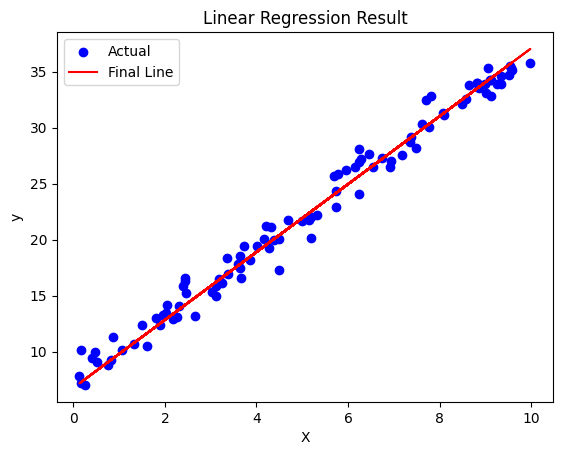

In [72]:
LinearRegression(x,y_true, draw=True)